In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis whole data set

In [4]:
df = pd.read_csv("Merged_Preprocessed_Mars2020_2021.csv")

**Show all columns**

In [6]:
df.columns

Index(['Coder', 'Asset_Name', 'Brand', 'Lead_Country', 'Year_Produced',
       'Year_Aired', 'Segment', 'Agency', 'Character_Name',
       'Character_Description', 'Prominence', 'Animated', 'Animated Specify',
       'Gender', 'Trans', 'Race', 'Race Other/Specify', 'API', 'Skin tone',
       'Sexual Orientation', 'Queer', 'Age', 'Disabled', 'Disability Specify',
       'Body Type', 'Shopping', 'Driving', 'Cleaning', 'Cooking', 'Working',
       'Socializing', 'Nothing', 'EatingDrinking', 'Exercising',
       'Other Activity', 'Activity Other Specify', 'Kitchen', 'Office', 'Car',
       'Store', 'Outdoors', 'Living Room', 'Restaurant/Bar', 'Gym', 'Bedroom',
       'Bathroom', 'Sporting Event', 'Classroom', 'Setting Other',
       'Other Setting Specify', 'Revealing Clothing', 'Nudity',
       'Visually Objectified', 'Verbally Objectified', 'Intelligent', 'Funny',
       'Occupation', 'Leader', 'Authority', 'Q27a_Disordered_Eating',
       'Q27b_Selfy_injury', 'Q27c_NegativeTalk', 'Q27d_

**Seperate to four dataframe of different columns**

In [43]:
segment_col = df[['Segment']]

age_col = df[['Age','Segment']]

sex_col = df[['Gender','Segment']]

# gender_col = df[['Q4_Gender','Segment']]

In [44]:
# add more columns
race_col = df[['Segment','Race']]
race_col_2 = df[['Segment','Race Other/Specify']]
# race_segment = df.groupby('room_type', as_index=False)

**category feature nunique distribution**

In [45]:
# classify feature
cat_fea =['Segment','Age','Gender','Race']
# category feature nunique distribution
for fea in cat_fea:
    print('*****************************')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df[fea].nunique()))
    print(df[fea].value_counts())

*****************************
Segment's feature distribution as follow'：
Segment feature has 4 different values
Confectionary    729
Petcare          346
Wrigley          119
Food              93
Name: Segment, dtype: int64
*****************************
Age's feature distribution as follow'：
Age feature has 8 different values
3      428
4      283
5      152
2      140
999    117
6       68
1       56
7       43
Name: Age, dtype: int64
*****************************
Gender's feature distribution as follow'：
Gender feature has 3 different values
1      760
2      524
888      3
Name: Gender, dtype: int64
*****************************
Race's feature distribution as follow'：
Race feature has 9 different values
1      705
3      216
999    113
2      107
4       86
6       28
888     21
8        6
5        5
Name: Race, dtype: int64


### Observation for entire dataset
**For Segment column, we can see the 'confectionary' accounts for half of the total data volume of Segment column**

**For Age column, most value are 3, which is the age of 20-29 year olds**

**For Race column, we find that value "1"("White") is the largest, the second one and thrid one are "3"("Asian/Asian American") and "999"("Not Applicable").** 

**We can find that the number of whites is greater than the sum of the numbers of all other races**


******
### Question :
### Are there industry differences in representation in advertisements?
### “industry” refers to the “Segment” column, and “representation” refers to all the question columns. 

In [46]:
industry = segment_col

In [47]:
industry.describe()

,Segment
count,1287
unique,4
top,Confectionary
freq,729


### Specific examples of how to interpret the questions could be: Are there segment differences in different ages?

### Industry differences of the Age column

In [48]:
age_col.head()

,Age,Segment
0,4,Confectionary
1,3,Confectionary
2,7,Confectionary
3,2,Confectionary
4,2,Confectionary


In [49]:
for i in range(1,9):
    df_age = age_col.loc[age_col['Age'] == i]
    print('Age =',i)
    print(df_age['Segment'].value_counts())
    print()

Age = 1
Petcare          25
Food             18
Confectionary    13
Name: Segment, dtype: int64

Age = 2
Confectionary    89
Wrigley          24
Petcare          19
Food              8
Name: Segment, dtype: int64

Age = 3
Confectionary    246
Petcare           91
Wrigley           60
Food              31
Name: Segment, dtype: int64

Age = 4
Confectionary    134
Petcare          106
Wrigley           23
Food              20
Name: Segment, dtype: int64

Age = 5
Confectionary    85
Petcare          52
Food             11
Wrigley           4
Name: Segment, dtype: int64

Age = 6
Confectionary    38
Petcare          24
Wrigley           5
Food              1
Name: Segment, dtype: int64

Age = 7
Petcare          22
Confectionary    17
Food              2
Wrigley           2
Name: Segment, dtype: int64

Age = 8
Series([], Name: Segment, dtype: int64)



### Observation for Age:

**We can find that among the Age=1, the Petcare is the most**

**With the increasing of the age, more people are in the "Confectionary" industry, but when Age = 7 the Petcare is greater than Confectionary**

**And by the statistics, we observe that the largest amount of data are in the "Confectionary" industry**

**And someone don't tell or are unwilling to disclose the information of age**

### Industry differences of the Gender column

In [50]:
sex_list = [1,2,3,888,999]
for i in sex_list:
    df_sex = sex_col.loc[sex_col['Gender'] == i]
    print('Gender =',i)
    print(df_sex['Segment'].value_counts())
    print()

Gender = 1
Confectionary    467
Petcare          186
Wrigley           60
Food              47
Name: Segment, dtype: int64

Gender = 2
Confectionary    262
Petcare          157
Wrigley           59
Food              46
Name: Segment, dtype: int64

Gender = 3
Series([], Name: Segment, dtype: int64)

Gender = 888
Petcare    3
Name: Segment, dtype: int64

Gender = 999
Series([], Name: Segment, dtype: int64)



### Observation for Gender:

**We can find that among the Gender = 1 which is "Man", the "Confectionary" is the most, "Food" is the smallest**

**We can find that among the Gender = 2 which is "Woman", the "Confectionary" is the most, "Food" is the smallest**

**We can find that among the Gender = 888 which is "Can't tell", there is only Petcare**

**And by the statistics, we observe that the largest amount of data are in the "Confectionary" industry**

**And some of people can not tell their gender**

### Deliverable 2 - Industry differences of the Race column

In [51]:
race_list = [1,2,3,4,5,6,7,8,888,999]
for i in race_list:
    df_race = race_col.loc[race_col['Race'] == i]
    print('Race =',i)
    print(df_race['Segment'].value_counts())
    print()

Race = 1
Confectionary    310
Petcare          263
Wrigley           79
Food              53
Name: Segment, dtype: int64

Race = 2
Confectionary    41
Petcare          39
Food             20
Wrigley           7
Name: Segment, dtype: int64

Race = 3
Confectionary    177
Wrigley           22
Petcare           15
Food               2
Name: Segment, dtype: int64

Race = 4
Confectionary    59
Petcare          14
Food              8
Wrigley           5
Name: Segment, dtype: int64

Race = 5
Food             3
Confectionary    1
Wrigley          1
Name: Segment, dtype: int64

Race = 6
Confectionary    23
Petcare           3
Wrigley           2
Name: Segment, dtype: int64

Race = 7
Series([], Name: Segment, dtype: int64)

Race = 8
Confectionary    3
Wrigley          2
Petcare          1
Name: Segment, dtype: int64

Race = 888
Confectionary    7
Food             7
Petcare          6
Wrigley          1
Name: Segment, dtype: int64

Race = 999
Confectionary    108
Petcare            5
Name: Segment

### Observation for Race:

**We can find that among the Race = 1("White"), the number of "Confectionary" is 310 and "Petcare " is 263 which are far more than "Wrigley" and "Food" industry. Majority of "White" work in these two industries**

**We can find that among the Race = 2("Black"), the "Confectionary" is also higher than other industries, each industry has "Black". The portion of "Petcare" for "Black" is the highest comparing with other ethnicities**

**We can find that among the Race = 3("Asian/Asian American"), there are very high number of people working in "Confectionary" industry.**

**We can find that among the Race = 4("Latinx"), the "Confectionary" is much higher than other industries.**

**We can find that among the Race = 5("Native"), there are small amount of data**

**We can find that among the Race = 6("Middle Eastern"), no one is in the "Food" industry. The ratio of "Confectionary" among industries for "Asian" is the highest comparing with other ethnicities**

**We can find that among the Race = 7("Multi-racial (only if you know for certain)"), there are no data**

**We can find that among the Race = 8("Non-white, but cannot tell specific race"), there are small amount of data, the number of "Confectionary" is 3, for "Petcare" is 2, for "Wrigley" is 1, no one is in "Food" industry**

**We can find that among the Race = 888("Can’t tell"), number of data is relatively small, the number of people for "Confectionary" and "Food" is same.**

**We can find that among the Race = 999("Not Applicable"), the "Confectionary" is higher than other industries, people are only in "Confectionary" and "Food" industry**

**By the statistics, we observe that the largest amount of data whatever their race are in the "Confectionary" industry**

**And many of people are "Not Applicable" of Race in "Confectionary" and "Food"**

****

### Try different way to answer the question, separate four different segments to different dataframes
### For Deliverable 2, add "Race" column

### **Create confectionary dataframe**

In [52]:
df_confectionary = df.loc[df['Segment'] == 'Confectionary']
df_confectionary = df_confectionary.loc[:,['Age','Gender', 'Race']]
df_confectionary.reset_index(inplace = True)
df_confectionary.drop('index', axis = 1, inplace = True)
df_confectionary.head()

,Age,Gender,Race
0,4,1,3
1,3,1,3
2,7,1,3
3,2,1,3
4,2,2,3


### category feature nunique distribution

In [53]:

cat_fea_confectionary =['Age','Gender','Race']
# category feature nunique distribution
for fea in cat_fea_confectionary:
    print('*****************************')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df_confectionary[fea].nunique()))
    print(df_confectionary[fea].value_counts())

*****************************
Age's feature distribution as follow'：
Age feature has 8 different values
3      246
4      134
999    107
2       89
5       85
6       38
7       17
1       13
Name: Age, dtype: int64
*****************************
Gender's feature distribution as follow'：
Gender feature has 2 different values
1    467
2    262
Name: Gender, dtype: int64
*****************************
Race's feature distribution as follow'：
Race feature has 9 different values
1      310
3      177
999    108
4       59
2       41
6       23
888      7
8        3
5        1
Name: Race, dtype: int64


### Plot Histogram for columns

<Figure size 432x288 with 0 Axes>

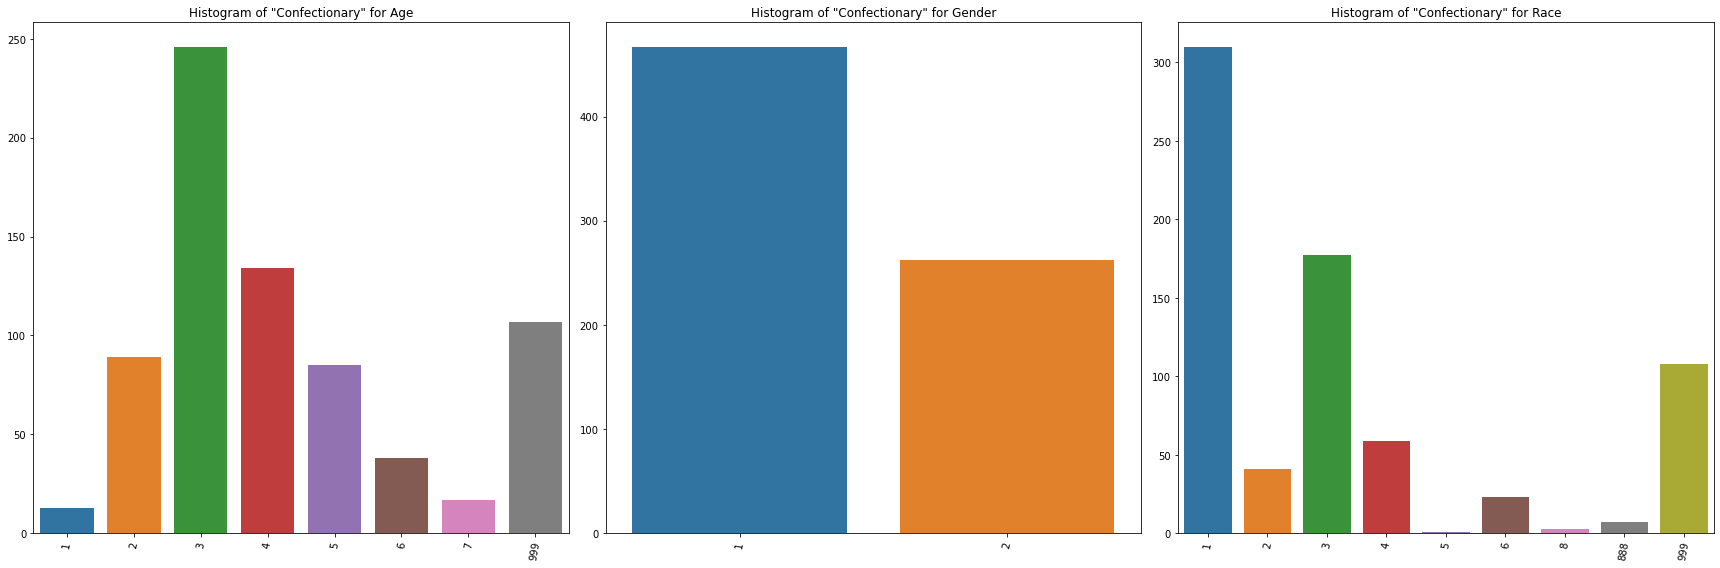

In [54]:
# plot histogram to show
plt.figure()
plt.figure(figsize=(24, 8))
i = 1
for fea in cat_fea_confectionary:
        plt.subplot(1, 3, i)
        i += 1
        v = df_confectionary[fea].value_counts().nlargest(15)
        fig = sns.barplot(x = v.index, y = v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('Histogram of "Confectionary" for '+fea)
plt.tight_layout()
plt.show()

**We can find that for Confectionary, the 20-29 age group(3) has the largest proportion, the second one is group(4)**

**Through Gender, we can find that the number of male is definitely greater than female**


**From the histogram, we observe that "White" has the largest number of any race in "Confectionary" industry, and there are large amount of "Asian/Pacific Islander" and "Not Applicable". Such a data distribution is almost consistent with the proportion of racial populations in the United States**

### Barplot for gender portions of confectionary

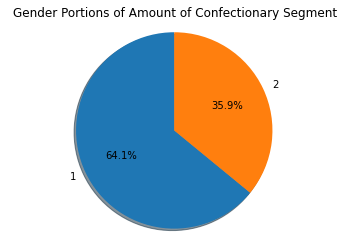

In [55]:
Sex1 = df_confectionary[df_confectionary['Gender'] == 1]['Gender'].value_counts()
Sex2 = df_confectionary[df_confectionary['Gender'] == 2]['Gender'].value_counts()

labels = '1','2'
sizes = [Sex1.values.item(), Sex2.values.item()]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Portions of Amount of Confectionary Segment')
plt.show()

**We can find that for Confectionary segment, the amount of "Man(1)" is 64.1%, which is more than "Woman(2)" (35.9%)**

**From the four barplot for gender portions of different industry, we can conclude that the Confectionary has the largest difference in the number of man and woman**

### Barplot for Race portions of confectionary

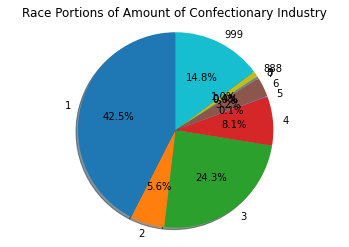

In [56]:
Sex1 = df_confectionary[df_confectionary['Race'] == 1]['Race'].value_counts()
Sex2 = df_confectionary[df_confectionary['Race'] == 2]['Race'].value_counts()
Sex3 = df_confectionary[df_confectionary['Race'] == 3]['Race'].value_counts()
Sex4 = df_confectionary[df_confectionary['Race'] == 4]['Race'].value_counts()
Sex5 = df_confectionary[df_confectionary['Race'] == 5]['Race'].value_counts()
Sex6 = df_confectionary[df_confectionary['Race'] == 6]['Race'].value_counts()
Sex7 = df_confectionary[df_confectionary['Race'] == 7]['Race'].value_counts()
Sex8 = df_confectionary[df_confectionary['Race'] == 8]['Race'].value_counts()
Sex888 = df_confectionary[df_confectionary['Race'] == 888]['Race'].value_counts()
Sex999 = df_confectionary[df_confectionary['Race'] == 999]['Race'].value_counts()


labels = '1','2','3','4','5','6','7','8','888','999'
sizes = [Sex1.values.item(), Sex2.values.item(), Sex3.values.item(), Sex4.values.item(), 
         Sex5.values.item(), Sex6.values.item(), 0, Sex8.values.item(), Sex888.values.item(), Sex999.values.item()]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Race Portions of Amount of Confectionary Industry')
plt.show()

**With barplot we can observe the result obviously**

### Compute Mean and std of Age for Confectionery

In [57]:
df_confectionary = df_confectionary.loc[df_confectionary['Age'] < 10]
age_mean_confectionary = df_confectionary['Age'].mean()
age_mean_confectionary = round(age_mean_confectionary, 2)
age_std_confectionary = df_confectionary['Age'].std()
age_std_confectionary = round(age_std_confectionary, 2)
print('Mean of Age is', age_mean_confectionary, 'Standard deviation of Age is',age_std_confectionary)

Mean of Age is 3.6 Standard deviation of Age is 1.27


**We exclude the value of '999' and '888', and we can get the average value of Age for the Confectionary industry is 3.6,the std value is 1.27**
*****

### **Create Petcare dataframe**

In [58]:
df_petcare = df.loc[df['Segment'] == 'Petcare']
df_petcare = df_petcare.loc[:,['Age','Gender', 'Race']]
df_petcare.reset_index(inplace = True)
df_petcare.drop('index',axis = 1, inplace = True)
# df_petcare.head()

In [59]:
# category feature nunique distribution
cat_fea_petcare =['Age','Gender', 'Race']
# category feature nunique distribution
for fea in cat_fea_petcare:
    print('*****************************')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df_petcare[fea].nunique()))
    print(df_petcare[fea].value_counts())

*****************************
Age's feature distribution as follow'：
Age feature has 8 different values
4      106
3       91
5       52
1       25
6       24
7       22
2       19
999      7
Name: Age, dtype: int64
*****************************
Gender's feature distribution as follow'：
Gender feature has 3 different values
1      186
2      157
888      3
Name: Gender, dtype: int64
*****************************
Race's feature distribution as follow'：
Race feature has 8 different values
1      263
2       39
3       15
4       14
888      6
999      5
6        3
8        1
Name: Race, dtype: int64


### Plot Histogram for columns

<Figure size 432x288 with 0 Axes>

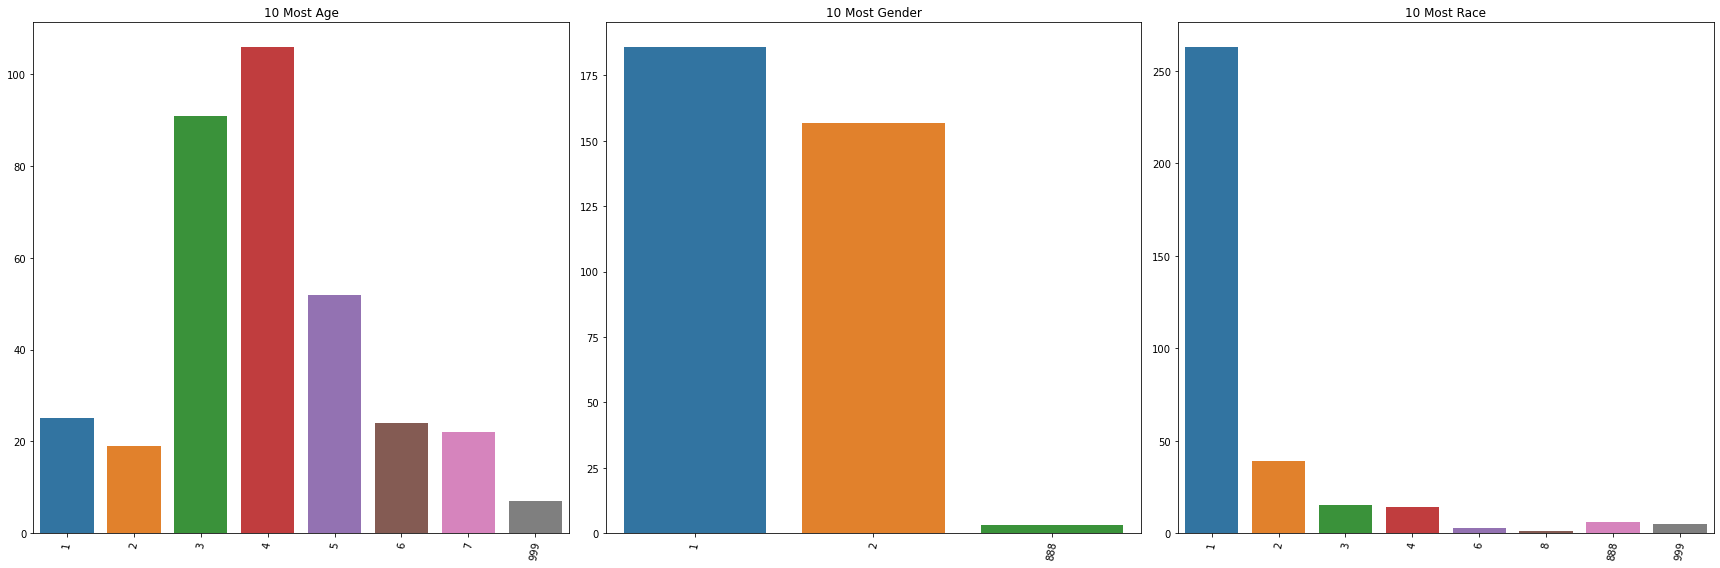

In [60]:
# plot histogram to show
plt.figure()
plt.figure(figsize=(24, 8))
i = 1
for fea in cat_fea_petcare:
        plt.subplot(1, 3, i)
        i += 1
        v = df_petcare[fea].value_counts().nlargest(15)
        fig = sns.barplot(x = v.index, y = v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('10 Most '+fea)
plt.tight_layout()
plt.show()

**We can find that for "Petcare", the 30s age group(4) has the largest proportion, the second one is group(3)**

**For "Percare", compared with other races, "White" is the largest**

### Barplot

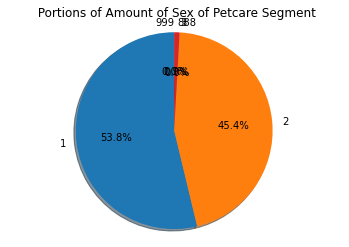

In [61]:
Sex1_petcare = df_petcare[df_petcare['Gender'] == 1]['Gender'].value_counts()
Sex2_petcare = df_petcare[df_petcare['Gender'] == 2]['Gender'].value_counts()
Sex3_petcare = df_petcare[df_petcare['Gender'] == 3]['Gender'].value_counts()
Sex888_petcare = df_petcare[df_petcare['Gender'] == 888]['Gender'].value_counts()
Sex999_petcare = df_petcare[df_petcare['Gender'] == 999]['Gender'].value_counts()

labels_petcare = '1','2','3','888','999'
sizes_petcare = [Sex1_petcare.values.item(), Sex2_petcare.values.item(), 0, Sex888_petcare.values.item(), 0]
explode_petcare = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes_petcare, explode = explode_petcare, labels = labels_petcare, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Sex of Petcare Segment')
plt.show()

**We can find that for Petcare, the amount of "Man(1)" is 53.8% which is the largest one, the amount of "Woman(2)" is 45.4% and the amount of "Can't tell(888)" is 0.9%**

### Compute Mean and std of Age for Petcare

In [62]:
df_petcare = df_petcare.loc[df_petcare['Age'] < 10]
age_mean_petcare = df_petcare['Age'].mean()
age_mean_petcare = round(age_mean_petcare, 2)
age_std_petcare = df_petcare['Age'].std()
age_std_petcare = round(age_std_petcare, 2)
print('Mean of Age is', age_mean_petcare, 'Standard deviation of Age is',age_std_petcare)

Mean of Age is 3.89 Standard deviation of Age is 1.47


**we can get the average value of Age for the Petcare industry is 3.89, which is higher than Confectionary industry, the std value is 1.47**
*****

## **Create Wrigley dataframe**

In [63]:
df_wrigley = df.loc[df['Segment'] == 'Wrigley']
df_wrigley = df_wrigley.loc[:,['Age', 'Gender', 'Race']]
df_wrigley.reset_index(inplace = True)
df_wrigley.drop('index' , axis = 1, inplace = True)
df_wrigley.head()

,Age,Gender,Race
0,3,2,1
1,3,2,3
2,3,1,3
3,3,1,1
4,3,1,1


In [64]:
# category feature nunique distribution
cat_fea_wrigley =['Age','Gender','Race']
# category feature nunique distribution
for fea in cat_fea_wrigley:
    print('*********************c********')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df_wrigley[fea].nunique()))
    print(df_wrigley[fea].value_counts())

*********************c********
Age's feature distribution as follow'：
Age feature has 7 different values
3      60
2      24
4      23
6       5
5       4
7       2
999     1
Name: Age, dtype: int64
*********************c********
Gender's feature distribution as follow'：
Gender feature has 2 different values
1    60
2    59
Name: Gender, dtype: int64
*********************c********
Race's feature distribution as follow'：
Race feature has 8 different values
1      79
3      22
2       7
4       5
8       2
6       2
5       1
888     1
Name: Race, dtype: int64


### Plot Histogram

<Figure size 432x288 with 0 Axes>

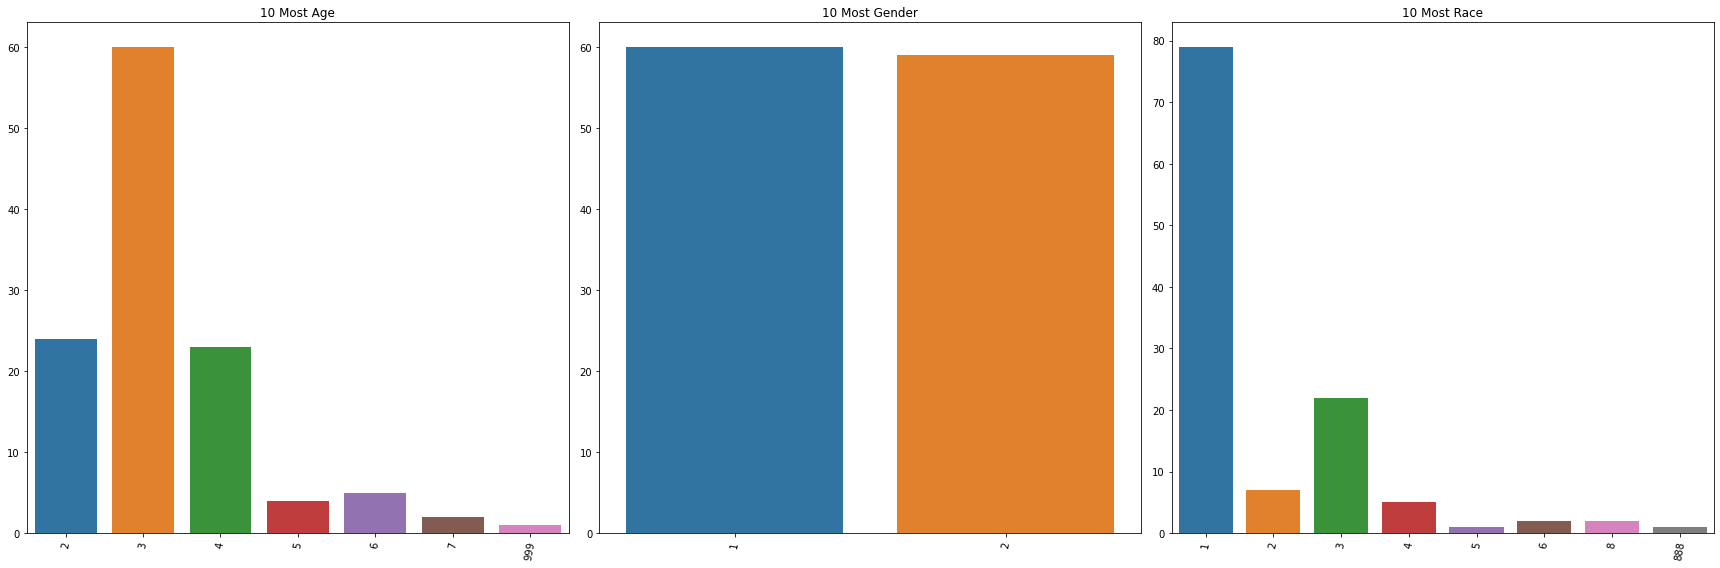

In [65]:
# plot histogram to show
plt.figure()
plt.figure(figsize=(24, 8))
i = 1
for fea in cat_fea_wrigley:
        plt.subplot(1, 3, i)
        i += 1
        v = df_wrigley[fea].value_counts().nlargest(15)
        fig = sns.barplot(x = v.index, y = v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('10 Most '+fea)
plt.tight_layout()
plt.show()

**We can find that for Petcare, the 20s age group(3) has the largest proportion, the second one is group(2), but number of group(3) is close to group(2)**

**For "Wrigley", compared with other races, "White" is the largest**

### BarPlot

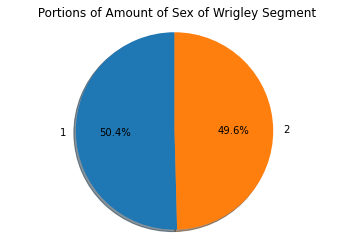

In [66]:
Sex1_wrigley = df_wrigley[df_wrigley['Gender'] == 1]['Gender'].value_counts()
Sex2_wrigley = df_wrigley[df_wrigley['Gender'] == 2]['Gender'].value_counts()

labels_wrigley = '1','2'
sizes_wrigley = [Sex1_wrigley.values.item(), Sex2_wrigley.values.item()]
explode_wrigley = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes_wrigley, explode = explode_wrigley, labels = labels_wrigley, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Sex of Wrigley Segment')
plt.show()

**We can find that for Confectionary segment, the amount of man is 50.4% which is more than woman 49.6%**

**The number of "men(1)" and "women(2)" is basically the same**

**From the four barplot for gender portions of different industry, we can conclude that the Wrigley has the smallest difference in the number of man and woman**

### Compute Mean and std of Age for Wrigley

In [67]:
df_wrigley = df_wrigley.loc[df_wrigley['Age'] < 10]
age_mean_wrigley = df_wrigley['Age'].mean()
age_mean_wrigley = round(age_mean_wrigley, 2)
age_std_wrigley = df_wrigley['Age'].std()
age_std_wrigley = round(age_std_wrigley, 2)
print('Mean of Age is', age_mean_wrigley, 'Standard deviation of Age is',age_std_wrigley)

Mean of Age is 3.25 Standard deviation of Age is 1.06


**we can get the average value of Age for the Wrigley industry is 3.25(around 20 years old), which is smaller than Confectionary and Petcare and bigger than Food, the std value is 1.06, means the age distribution is relatively concentrated**
*****

## **Create Food dataframe**

In [68]:
df_food = df.loc[df['Segment'] == 'Food']
df_food = df_food.loc[:,['Age', 'Gender', 'Race']]
df_food.reset_index(inplace = True)
df_food.drop('index', axis = 1, inplace = True)
df_food.head()

,Age,Gender,Race
0,3,2,1
1,3,2,1
2,3,2,1
3,3,1,1
4,3,1,1


In [69]:
# category feature nunique distribution
cat_fea_food =['Age','Gender', 'Race']
# category feature nunique distribution
for fea in cat_fea_food:
    print('*****************************')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df_food[fea].nunique()))
    print(df_food[fea].value_counts())

*****************************
Age's feature distribution as follow'：
Age feature has 8 different values
3      31
4      20
1      18
5      11
2       8
7       2
999     2
6       1
Name: Age, dtype: int64
*****************************
Gender's feature distribution as follow'：
Gender feature has 2 different values
1    47
2    46
Name: Gender, dtype: int64
*****************************
Race's feature distribution as follow'：
Race feature has 6 different values
1      53
2      20
4       8
888     7
5       3
3       2
Name: Race, dtype: int64


### Plot Histogram

<Figure size 432x288 with 0 Axes>

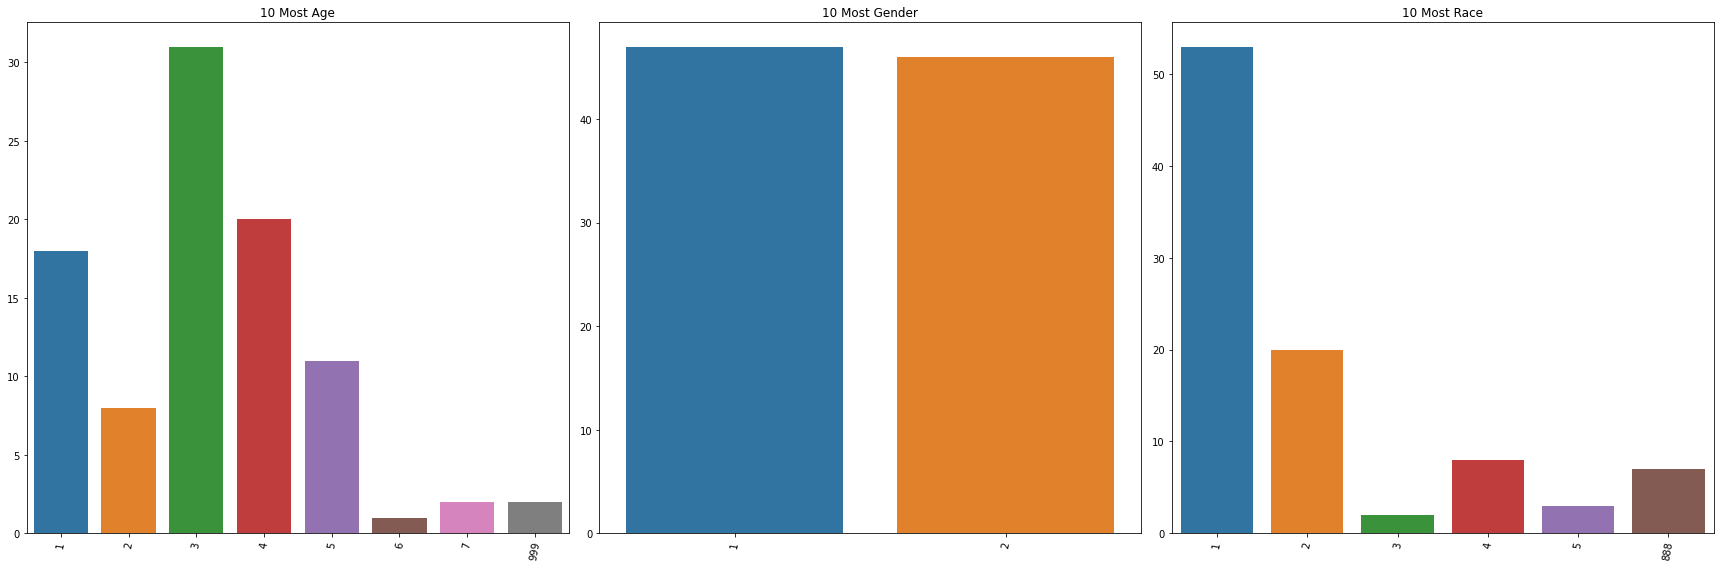

In [70]:
# plot histogram to show
plt.figure()
plt.figure(figsize=(24, 8))
i = 1
for fea in cat_fea_food:
        plt.subplot(1, 3, i)
        i += 1
        v = df_food[fea].value_counts().nlargest(15)
        fig = sns.barplot(x = v.index, y = v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('10 Most '+fea)
plt.tight_layout()
plt.show()

**We can find that for Petcare, the 20s age group(3) has the largest proportion, the second one is group(4), and the number of group(1) is close to group(4)**

**For "Food", compared with other races, "White" is the largest**

### Barplot

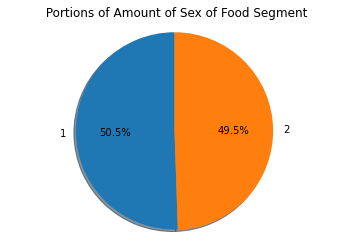

In [71]:
Sex1_food = df_food[df_food['Gender'] == 1]['Gender'].value_counts()
Sex2_food = df_food[df_food['Gender'] == 2]['Gender'].value_counts()

labels_food = '1','2'
sizes_food = [Sex1_food.values.item(), Sex2_food.values.item()]
explode_food = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes_food, explode = explode_food, labels = labels_food, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Sex of Food Segment')
plt.show()

**We can find that for Confectionary segment, the amount of "Man(1)" is 50.5% which is more than "Women(2)" 49.5%**

**The number of "Man(1)" and "Woman(2)" is basically the same**

### Compute Mean and std of Age for Food

In [72]:
df_food = df_food.loc[df_food['Age'] < 10]
age_mean_food = df_food['Age'].mean()
age_mean_food = round(age_mean_food, 2)
age_std_food = df_food['Age'].std()
age_std_food = round(age_std_food, 2)
print('Mean of Age is', age_mean_food, 'Standard deviation of Age is',age_std_food)

Mean of Age is 3.1 Standard deviation of Age is 1.43


**we can get the average value of Age for the Food industry is 3.1, which is smallest among these four industry, the std value is 1.43, means the age distribution is not relatively concentrated**

**We can conclude that the the average age of the Food is the youngest**